<a href="https://colab.research.google.com/github/silvererudite/30-for-30-ml-projects/blob/main/pytorch-tuts/building_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import torch
import numpy as np
import matplotlib.pyplot as plt


# Regression without NN

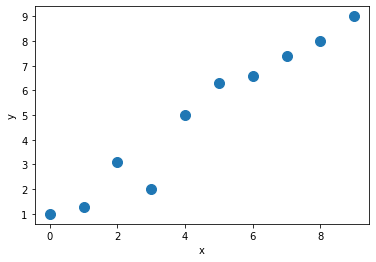

In [15]:
X_train = np.arange(10, dtype='float32').reshape((10, 1))
y_train =  np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6,7.4, 8.0,9.0], dtype='float32')
plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [16]:
from torch.utils.data import TensorDataset, DataLoader

X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm)
y_train = torch.from_numpy(y_train)
train_ds = TensorDataset(X_train_norm, y_train)
batch_size = 1
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [17]:
torch.manual_seed(1)
weight = torch.randn(1)
weight.requires_grad_()
bias = torch.zeros(1, requires_grad=True)

def model(xb):
  return xb @ weight + bias

In [18]:
def loss_fn(input, target):
  return (input-target).pow(2).mean()

In [19]:
learning_rate = 0.001
num_epochs = 200
log_epochs = 10
for epoch in range(num_epochs):
  for x_batch, y_batch in train_dl:
    pred = model(x_batch)
    loss = loss_fn(pred, y_batch)
    loss.backward()
  with torch.no_grad():
    weight -= weight.grad * learning_rate
    bias -= bias.grad * learning_rate
    weight.grad.zero_()
    bias.grad.zero_()
  if epoch % log_epochs == 0:
    print(f" epoch {epoch}  Loss {loss.item():.4f}")

 epoch 0  Loss 46.5720
 epoch 10  Loss 27.1502
 epoch 20  Loss 1.6446
 epoch 30  Loss 14.4571
 epoch 40  Loss 11.7827
 epoch 50  Loss 6.4122
 epoch 60  Loss 0.6339
 epoch 70  Loss 3.1562
 epoch 80  Loss 2.0100
 epoch 90  Loss 0.3107
 epoch 100  Loss 0.7625
 epoch 110  Loss 1.0024
 epoch 120  Loss 0.0232
 epoch 130  Loss 0.5138
 epoch 140  Loss 0.0741
 epoch 150  Loss 1.8712
 epoch 160  Loss 0.0007
 epoch 170  Loss 0.0850
 epoch 180  Loss 0.0634
 epoch 190  Loss 0.0012


In [20]:
print('Final Parameters:', weight.item(), bias.item())


Final Parameters: 2.670930862426758 4.88258695602417


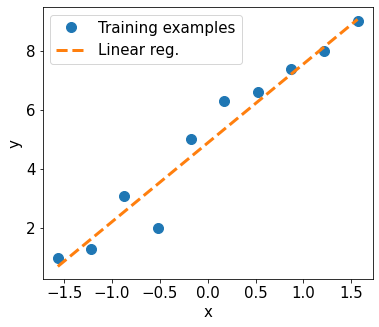

In [21]:
X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach().numpy()

fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [22]:
import torch.nn as nn
loss_fn = nn.MSELoss(reduction='mean')
input_size = 1
output_size = 1
model = nn.Linear(input_size, output_size)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [23]:
for epoch in range(num_epochs):
  for x_batch, y_batch in train_dl:
    pred = model(x_batch)[:, 0]
    loss = loss_fn(pred, y_batch)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
  if epoch % log_epochs==0:
    print(f'Epoch {epoch} Loss{loss.item():.4f}')

Epoch 0 Loss24.6684
Epoch 10 Loss29.1377
Epoch 20 Loss20.9207
Epoch 30 Loss0.1257
Epoch 40 Loss12.4922
Epoch 50 Loss1.7845
Epoch 60 Loss7.6425
Epoch 70 Loss2.5606
Epoch 80 Loss0.0157
Epoch 90 Loss0.7548
Epoch 100 Loss0.8412
Epoch 110 Loss0.4923
Epoch 120 Loss0.0823
Epoch 130 Loss0.0794
Epoch 140 Loss0.0891
Epoch 150 Loss0.0973
Epoch 160 Loss0.1043
Epoch 170 Loss0.1103
Epoch 180 Loss0.0009
Epoch 190 Loss0.0764


In [24]:
print('Final parameters:' , model.weight.item(), model.bias.item())

Final parameters: 2.6496422290802 4.87706995010376


# Building and MLP 

In [25]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris['data']
y = iris['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1./3, random_state=1)

In [26]:
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train)
train_ds = TensorDataset(X_train_norm, y_train)
torch.manual_seed(1)
batch_size = 2
train_dl = DataLoader(train_ds, batch_size, shuffle=True)                                                   

Dimensionality of a Tensor - rank and shape

In [28]:
class Model(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super().__init__()
    self.layer1 = nn.Linear(input_size, hidden_size)
    self.layer2 = nn.Linear(hidden_size, output_size)
  def forward(self, x):
    x = self.layer1(x)
    x = nn.Sigmoid()(x)
    x = self.layer2(x)
    x = nn.Softmax(dim=1)(x)
    return x

In [29]:
input_size = X_train_norm.shape[1]
hidden_size = 16
output_size = 3

model = Model(input_size, hidden_size, output_size)

In [30]:
learning_rate = 0.001
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
num_epochs = 100
loss_hist = [0]*num_epochs
accuracy_hist = [0]* num_epochs
for epoch in range(num_epochs):
  for x_batch, y_batch in train_dl:
    pred = model(x_batch)
    loss = loss_fn(pred, y_batch)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    loss_hist[epoch] += loss.item()*y_batch.size(0)
    is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
    accuracy_hist[epoch] += is_correct.mean()
  loss_hist[epoch] /= len(train_dl.dataset)
  accuracy_hist[epoch] /= len(train_dl.dataset)

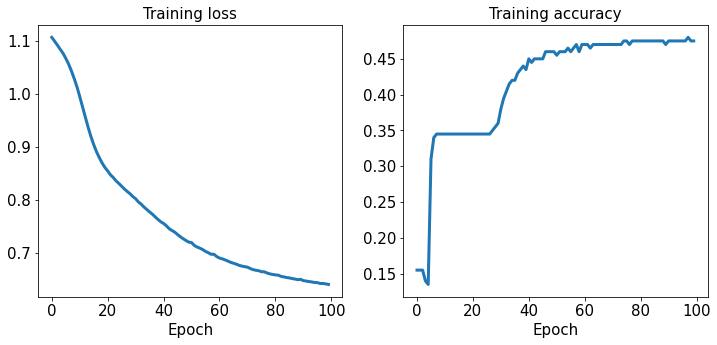

In [31]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_hist, lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(accuracy_hist, lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [32]:
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm).float()
y_test = torch.from_numpy(y_test) 
pred_test = model(X_test_norm)
correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()
print(f'Test Acc.: {accuracy:.4f}')

Test Acc.: 0.9800


## Saving models

In [ ]:
# path = 'iris_classifier.pt'
# torch.save(model, path)

#model = torch.load(path)

In [33]:
model.eval()

Model(
  (layer1): Linear(in_features=4, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=3, bias=True)
)

## Saving model parameters only

In [ ]:
# path = 'iris_classifier_state.pt'
# torch.save(model.state_dict(), path)

# model_new = Model(input_size, hidden_size, output_size)
# model_new.load_state_dict(torch.load(path))
